In [17]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('name_principals_clean.csv')
df = df.drop_duplicates() 

In [12]:
subset = df[df['category'] == 'actor']


actor_avg = subset.groupby('primaryName')['averageRating'].mean()

ranks=actor_avg.sort_values(ascending=False)

ranks.head(40)

## checks top actors by average movie rating



primaryName
Jens-Peter Erichsen    10.0
Michael Nowka           9.8
Manfred Meurer          9.8
Ercan Durmaz            9.8
Matthew Dawson          9.8
Sebastian Rabl          9.7
James Lawless           9.6
Klaus-Peter Grap        9.5
Ronald Dehne            9.5
René Schell             9.5
Christoph Quest         9.5
Hermann Wenning         9.5
Rostas Gabor            9.5
José van der Schoot     9.5
Fred Bräutigam          9.5
Leonardo Putzgruber     9.4
Carlos Werner           9.4
Hans Peter Falkner      9.4
Walter F. Scott         9.4
Hans Musäus             9.4
Fermín Iniesta          9.4
Gyula Fehér             9.4
Markus Binder           9.4
Hans-Albert Martens     9.4
Aníbal Bordallo         9.4
Antonio Ventura         9.4
Bob Hevelone            9.3
Conrad Tovar            9.3
Volker Spahr            9.3
Bill Grant              9.3
Ted Burnett             9.3
Akira Kume              9.3
Billy Daniel            9.3
Lothar Blumhagen        9.2
Heiner Reddemann        9.2
Gert Nie

In [13]:
subset = df[df['category'] == 'director']


dir_avg =subset.groupby('primaryName')['averageRating'].mean()

ranks=dir_avg.sort_values(ascending=False)

ranks.head(40)

## top directors by average movie rating



primaryName
Marcus Kanter               10.00
Ulrich Lauterbach            9.90
Alexandra Brodsky            9.80
Ayhan Salar                  9.80
Gustav Burmester             9.80
Dominik Zen                  9.70
Franz Morak                  9.70
Sandra Osawa                 9.60
John D. Goodell              9.60
Matl Findel                  9.50
Hans Bachmüller              9.40
Joaquín Hidalgo              9.40
Erich Neureuther             9.40
Petar Grimani                9.30
Noel Madison                 9.30
Filipe Paulo                 9.30
Gábor Dettre                 9.30
Edward Rothe                 9.30
Magda Dulcic                 9.20
Pat Hartigan                 9.20
Ronald Eyre                  9.20
Gavin Taylor                 9.20
Thad Halcli                  9.20
Jane Jensen                  9.10
Ramiro Puerta                9.10
Hanns Farenburg              9.10
Nora Jacobson                9.10
Jim Holliday                 9.10
Christian Baudissin          9.10
Lu

In [18]:
filtered = df[df['category'] == 'actor']
filtered['primaryName'].value_counts()
## checks who acted in the most movies - I had to google the guy with 889.. he does voices for bugs bunny and stuff!


primaryName
Mel Blanc              889
Pinto Colvig           251
Moe Howard             208
Larry Fine             206
Billy Bletcher         188
                      ... 
Ali Achmed Taram         1
Heinz Lieven             1
Ennio Panosetti          1
Carlos Alberto Baía      1
Master Ravi              1
Name: count, Length: 56743, dtype: int64

In [16]:
filtered = df[df['category'] == 'director']
filtered['primaryName'].value_counts()
##  who directed the most movies

primaryName
D.W. Griffith     424
Dave Fleischer    423
Friz Freleng      301
Chuck Jones       282
Sam Newfield      190
                 ... 
Jorge Zanada        1
Åke Grönberg        1
Harry Gerstad       1
József Kis          1
Tim Boxell          1
Name: count, Length: 19135, dtype: int64

Does Size of cast affect rating

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('moviedb')
df=pd.read_sql('select * from  principals p', conn) ## principals is a list of main people who worked on each movie


In [6]:
actors=df['category']=='actor'  ## filters to only actors
adf=df[actors]

In [8]:
adf['tconst'].value_counts()


tconst
tt0003112    10
tt0098931    10
tt0048855    10
tt0051286    10
tt0071076    10
             ..
tt0057368     1
tt0028166     1
tt0069472     1
tt0112232     1
tt0083844     1
Name: count, Length: 107749, dtype: int64

Text(0, 0.5, 'Frequency')

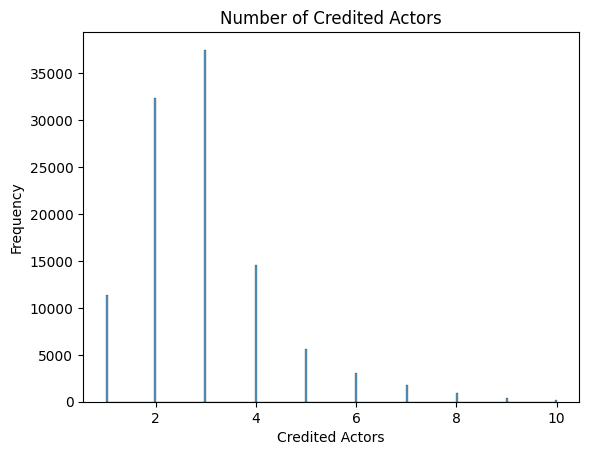

In [13]:
sns.histplot(adf['tconst'].value_counts())
plt.title('Number of Credited Actors')
plt.xlabel('Credited Actors')
plt.ylabel('Frequency')
## Histogram of how many credited actors are in each movie

In [37]:
## For the next graph we need to grab ratings data
rdf=pd.read_sql('select * FROM  principals p join ratings r on p.tconst=r.tconst', conn) 




In [38]:
filter=rdf['category']=='actor'  ## filters to only actors
rdf=rdf[filter]
rdf = rdf.loc[:, ~rdf.columns.duplicated()] ## remove one of the duplicated columns





In [53]:
result = rdf.groupby('tconst').agg({'nconst': 'nunique', 'averageRating': 'mean'}).reset_index()  ## tconst is movie name, nconst is unique actors in it, and adding the rating
result.columns = ['Movie', 'Total Actors', ' Rating']
result.head(10)


,Movie,Total Actors,Rating
0,tt0000005,2,6.1
1,tt0000007,2,5.4
2,tt0000008,1,5.4
3,tt0000009,2,6.0
4,tt0000011,1,5.2
5,tt0000014,2,7.1
6,tt0000017,1,4.6
7,tt0000018,1,5.3
8,tt0000026,4,5.6
9,tt0000036,1,4.4


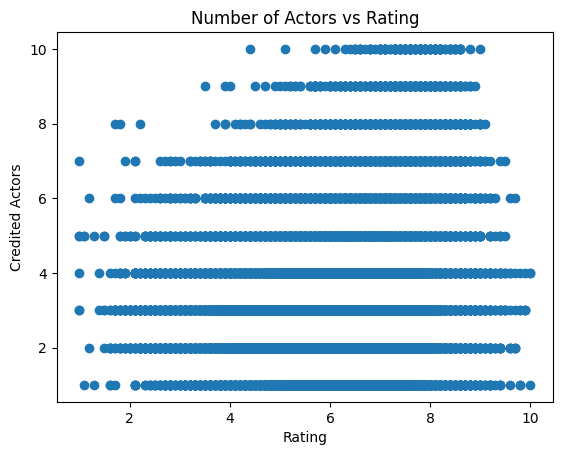

In [52]:
plt.scatter(y=result['Total Actors'],x= result[' Rating'])
plt.xlabel('Rating')
plt.ylabel('Credited Actors')
plt.title('Number of Actors vs Rating')
plt.show()
## We can see a very slight pattern